Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
%%capture
! pip install git+https://github.com/LegrandNico/metadPy.git
! pip install numpyro

In [2]:
import numpy as np
import arviz as az
import numpyro
from metadPy.hierarchical import hmetad

# Set the number of cores used by Numpyro
numpyro.set_host_device_count(2)

# Fitting data at the subject level

## From response-signal arrays
### Using Pymc3

In [3]:
# Create responses data
nR_S1 = np.array([52, 32, 35, 37, 26, 12, 4, 2])
nR_S2 = np.array([2, 5, 15, 22, 33, 38, 40, 45])

This function will return two variable. The first one is a Pymc3 model variable

In [4]:
model, traces = hmetad(nR_S1=nR_S1, nR_S2=nR_S2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [cS2_hn, cS1_hn, metad, d1, c1]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 19 seconds.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:329: UserWarning: Could not compute log_likelihood, it will be omitted. Check your model object or set log_likelihood=False
  warnings.warn(warn_msg)


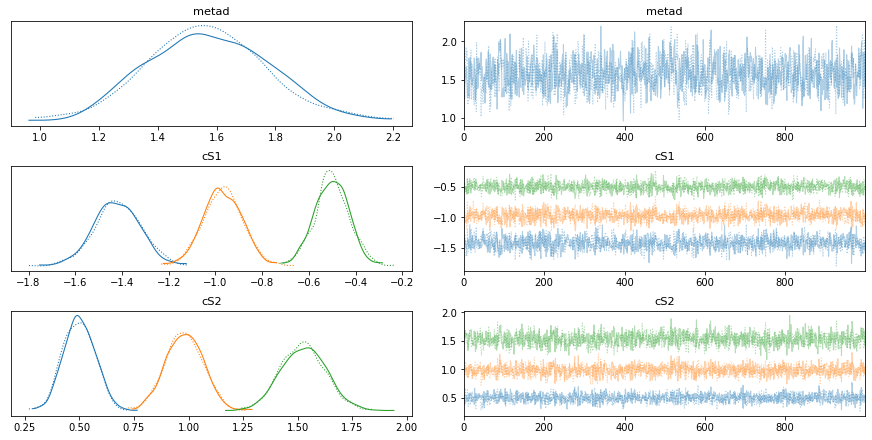

In [5]:
az.plot_trace(traces);

In [6]:
az.summary(traces)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
metad,1.570,0.203,1.181,1.929,0.006,0.004,1075.0,1263.0,1.0
cS1[0],-1.420,0.099,-1.593,-1.219,0.003,0.002,1401.0,1654.0,1.0
cS1[1],-0.969,0.083,-1.124,-0.818,0.002,0.002,1338.0,1481.0,1.0
cS1[2],-0.501,0.073,-0.640,-0.367,0.002,0.001,1387.0,1537.0,1.0
cS2[0],0.499,0.072,0.366,0.626,0.002,0.001,1573.0,1449.0,1.0
cS2[1],0.981,0.086,0.828,1.144,0.002,0.002,1381.0,1681.0,1.0
cS2[2],1.527,0.104,1.313,1.702,0.003,0.002,1290.0,1605.0,1.0


### Using Nupyro

In [7]:
model, traces = hmetad(nR_S1=nR_S1, nR_S2=nR_S2, backend="numpyro")

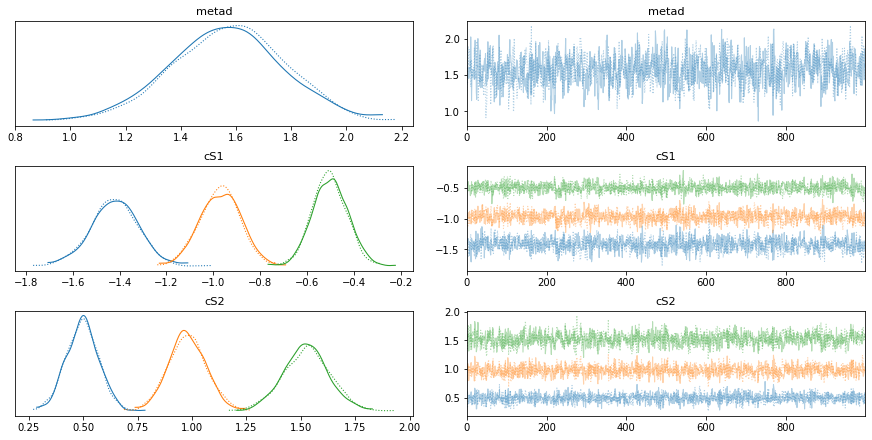

In [9]:
az.plot_trace(traces, var_names=["metad", "cS1", "cS2"]);

In [10]:
az.summary(traces, var_names=["metad", "cS1", "cS2"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
metad,1.568,0.202,1.167,1.926,0.007,0.005,953.0,1418.0,1.0
cS1[0],-1.420,0.101,-1.622,-1.237,0.003,0.002,1197.0,1314.0,1.0
cS1[1],-0.970,0.086,-1.136,-0.818,0.002,0.002,1256.0,1232.0,1.0
cS1[2],-0.502,0.074,-0.643,-0.369,0.002,0.001,1462.0,1050.0,1.0
cS2[0],0.496,0.074,0.358,0.636,0.002,0.001,1708.0,1221.0,1.0
cS2[1],0.978,0.086,0.820,1.144,0.002,0.002,1533.0,1416.0,1.0
cS2[2],1.525,0.105,1.314,1.711,0.003,0.002,1152.0,1405.0,1.0
